In [63]:
import pandas as pd
from sklearn import linear_model, datasets
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

print(datasets.load_diabetes().DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

In [64]:
diabetes_data = datasets.load_diabetes()
df_diabetes = pd.DataFrame(diabetes_data.data,columns=diabetes_data.feature_names)
df_diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


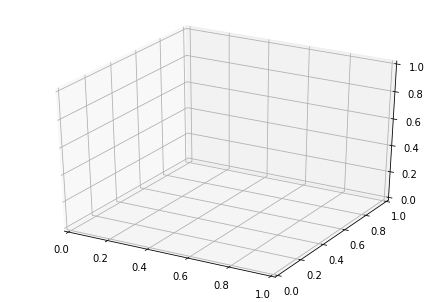

In [65]:
fig = plt.figure()
ax = Axes3D(fig)

In [66]:
edad = df_diabetes['age']
PA = df_diabetes['bp']
IMC = df_diabetes['bmi']
dataX2 = pd.DataFrame()
dataX2['age'] = edad
dataX2['bp'] = PA
XY_train = np.array(dataX2)

In [67]:
regr = linear_model.LinearRegression()
regr.fit(XY_train, IMC)
predict_IMC = regr.predict(XY_train)
regr.score(XY_train,IMC)

0.15945324946060013

In [68]:
xx, yy = np.meshgrid(np.linspace(-0.2, 0.2), np.linspace(-0.2, 0.2))
nuevoX = (regr.coef_[0] * xx)
nuevoY = (regr.coef_[1] * yy)
z = (nuevoX + nuevoY + regr.intercept_)

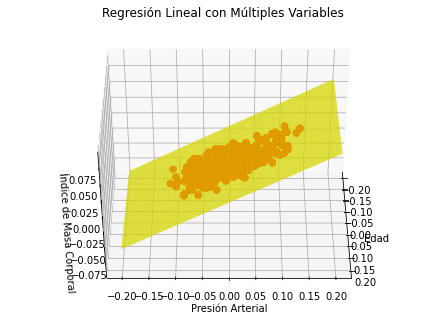

In [74]:
ax.plot_surface(xx, yy, z, alpha=0.2, color='yellow')
 
#ax.scatter(XY_train[:, 0], XY_train[:, 1], IMC, c='blue',s=30)
 
ax.scatter(XY_train[:, 0], XY_train[:, 1], predict_IMC, c='red',s=40)
 
ax.view_init(elev=40, azim=0)
        
ax.set_xlabel('Edad')
ax.set_ylabel('Presión Arterial')
ax.set_zlabel('Índice de Masa Corporal')
ax.set_title('Regresión Lineal con Múltiples Variables')

fig